In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import numba as nb
import charges as charges
import plotting as plotting

In [2]:
high_temp = 50
low_temp = 0.1
steps = 100
linear = np.linspace(high_temp, low_temp, steps)

In [3]:
geometric = np.geomspace(high_temp,low_temp,steps)

In [4]:
# exponential = np.logspace(-9,0,steps, base=2)
diff = high_temp/steps
print(diff)

0.5


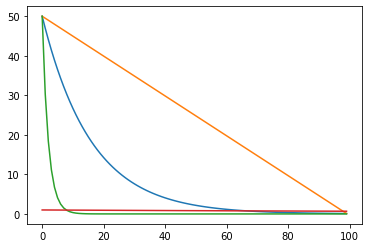

In [5]:
x = np.linspace(low_temp,high_temp,steps)
plt.figure()
plt.plot(geometric)
plt.plot(linear)
# plt.scatter(x,0.001**x, marker=2)
plt.plot([high_temp * np.exp(-diff*x) for x in range(steps)])
plt.plot(high_temp ** (np.array(range(steps))*-0.001))
plt.show()

In [6]:
# np.exp(np.arange(low_temp, high_temp)*-0.001) * high_temp

In [7]:
# [high_temp * np.exp(-0.001*x) for x in range(steps)]

In [8]:
# [high_temp * np.exp(-0.001*x) for x in range(steps)]

In [9]:
# plt.plot([high_temp * np.exp(-0.001*x) for x in range(10000)])

In [10]:
p1 = np.array([1,1])
p2 = np.array([2,2])
delta_x = np.abs(p1[0] - p2[0])
delta_y = np.abs(p1[1] - p2[1])
opp_angle = math.radians(90-math.degrees(math.atan(delta_y/delta_x)))
opp_x = math.sin(math.radians((opp_angle)))

In [11]:
arr_2d = np.vstack(([1,2,3,4,5],[10,20,30,40,50])).T
arr_2d

array([[ 1, 10],
       [ 2, 20],
       [ 3, 30],
       [ 4, 40],
       [ 5, 50]])

In [12]:
a1, a2 = arr_2d, arr_2d
m1,n1 = a1.shape
m2,n2 = a2.shape
out = np.zeros((m1,m2,n1+n2),dtype=int)
out[:,:,:n1] = a1[:,None,:]
out[:,:,n1:] = a2
out.shape = (m1*m2,-1)
out

array([[ 1, 10,  1, 10],
       [ 1, 10,  2, 20],
       [ 1, 10,  3, 30],
       [ 1, 10,  4, 40],
       [ 1, 10,  5, 50],
       [ 2, 20,  1, 10],
       [ 2, 20,  2, 20],
       [ 2, 20,  3, 30],
       [ 2, 20,  4, 40],
       [ 2, 20,  5, 50],
       [ 3, 30,  1, 10],
       [ 3, 30,  2, 20],
       [ 3, 30,  3, 30],
       [ 3, 30,  4, 40],
       [ 3, 30,  5, 50],
       [ 4, 40,  1, 10],
       [ 4, 40,  2, 20],
       [ 4, 40,  3, 30],
       [ 4, 40,  4, 40],
       [ 4, 40,  5, 50],
       [ 5, 50,  1, 10],
       [ 5, 50,  2, 20],
       [ 5, 50,  3, 30],
       [ 5, 50,  4, 40],
       [ 5, 50,  5, 50]])

In [13]:
particles = arr_2d
def euclidean_vec(combs):
    """ Compute the euclidean distance between two points
    """

    return np.sqrt((combs[:,0]- combs[:,1])**2 + (combs[:,2]- combs[:,3])**2)
    # return np.linalg.norm(p2 - p1)

def evaluate_configuration_fast(particles):
    """No idea if this is acc faster."""

    # generate combinations
    m, n = particles.shape
    comb = np.zeros((m, m, n + n), dtype=int)
    comb[:, :, :n] = particles[:, None, :]
    comb[:, :, n:] = particles
    comb.shape = (m * m, -1) # shape is 4 columns w len(particles) rows
    # now we also get p1 -p1 combinations, but
    # their inter-particle distance is 0, so we can ignore that fact

    return 1/np.sum(euclidean_vec(comb))

In [14]:
evaluate_configuration_fast(particles)

0.0009934116818428723

---------------


In [87]:
import matplotlib.cm as cm

def plot_ez(init_points, res):
    points = res

    theta = np.linspace(0, 2 * np.pi, 150)
    a = 1 * np.cos(theta)
    b = 1 * np.sin(theta)

    fig, ax = plt.subplots(1, figsize = (8,8))
    ax.plot(a, b, color='black')
    # plotpoints = []
    # for p in points:
    colors = list(cm.rainbow(np.linspace(0, 1, len(points))))
    for i in range(len(points)):
        ax.scatter(init_points[i,0], init_points[i,1],color=colors[i])
        ax.scatter(points[i,0], points[i,1],s=100,marker='X',color=colors[i])
    # scatter = ax.scatter(init_points[:,0], init_points[:,1], color='black',label='before')
    # scatter = ax.scatter(points[:,0], points[:,1], color='red',s=100,marker='x', label = 'black')

    ax.set_aspect(1)
    plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[ 0.4028671   0.81706605]
 [ 0.35703593 -0.22711501]
 [ 0.23198863  0.88836221]
 [ 0.06230921 -0.8204799 ]]
[0.5 0.  1.  1. ]


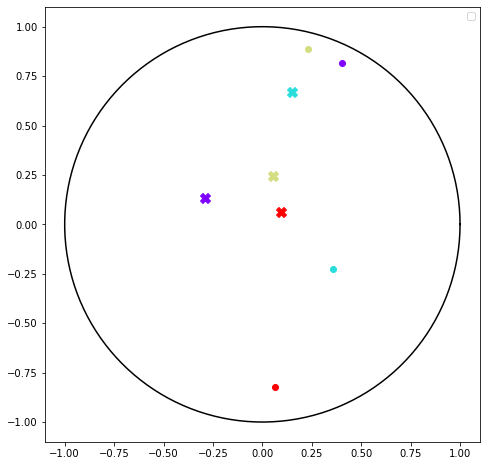

In [88]:


my_charge = charges.Charges(4,1)
init_points = my_charge.generate_points(4)
print(init_points)
my_charge.evaluate_configuration()
# my_charge.evaluate_configuration_fast() # does not work, div by 0
colors = cm.rainbow(np.linspace(0, 1, len(init_points)))
print(colors[0])
res = my_charge.iterate_SA_optimize(0,50,100,'exponential_0.01', False)
res
plot_ez(init_points,res)

array([[-0.43540414,  0.40953637],
       [ 0.61326228, -0.20973377]])